## Black-hole binary formation channels with gaussian mixtures

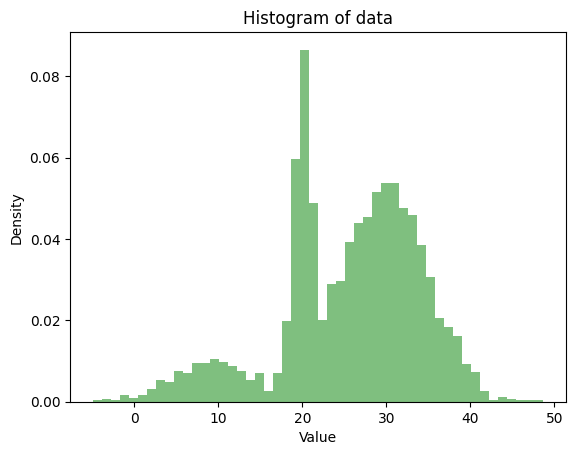

In [3]:
from sklearn.mixture import GaussianMixture
import numpy as np
#carico i dati dal file da formationchannels.npy
data = np.load(r'C:\Users\domen\Desktop\my_env\astrostatistics_bicocca_2025\solutions\formationchannels.npy', allow_pickle=True)
import matplotlib.pyplot as plt
#plotto i dati in un istogramma
plt.hist(data, bins=50, density=True, alpha=0.5, color='g')
plt.title('Histogram of data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

Fitting models: 100%|██████████| 10/10 [00:00<00:00, 18.32it/s]


Best model has 3 components with AIC: 20083.50553692163


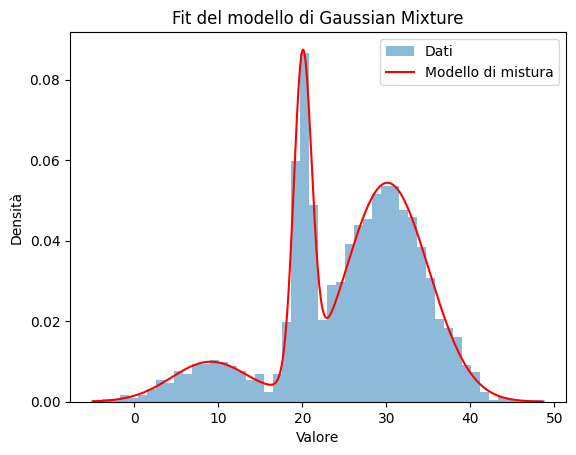

In [10]:
from tqdm import tqdm
#fitto i dati con un modello di mixture gaussiana per n_components da 1 a 10
aic_values = [] #list to store AIC values
models = [] #list to store models
Ns = range(1,11) #number of components to try
for n_components in tqdm(Ns, desc="Fitting models"): 
    model = GaussianMixture(n_components=n_components, random_state=42) #initialize the model
    model.fit(data) #fit the model to the data
    aic_values.append(model.aic(data)) #store the AIC value
    models.append(model) #store the model

#seleziono il modello con il valore di AIC piu' basso
best_model_index = np.argmin(aic_values) #index of the best model
best_model = models[best_model_index] #best model
print(f"Best model has {best_model.n_components} components with AIC: {aic_values[best_model_index]}")
#plotto i dati con il modello migliore
x = np.linspace(min(data), max(data), 1000) #x values for plotting
x = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)
logprob = best_model.score_samples(x)
pdf = np.exp(logprob)
plt.hist(data, bins=50, density=True, alpha=0.5, label="Dati")
plt.plot(x, pdf, label="Modello di mistura", color='red')
plt.title("Fit del modello di Gaussian Mixture")
plt.xlabel("Valore")
plt.ylabel("Densità")
plt.legend()
plt.show()
